In [6]:
# Read the dataset
df = pd.read_csv("/Users/vivekvardhan/Documents/37000_reviews_of_thread_app.csv", encoding='latin1')

# Downscale 
df = df.head(1000)
print(df.shape)

(1000, 14)


In [7]:
df.head()

,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,5,0.0,2023-08-07 19:14:36,NaN,NaN,294.0.0.27.110,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,NaN,NaN,NaN,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,NaN,NaN,294.0.0.27.110,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,5,0.0,2023-08-07 18:37:16,NaN,NaN,NaN,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,5,0.0,2023-08-07 18:14:15,NaN,NaN,NaN,en,us


In [8]:
example = df['review_description']
print(example)

0                                                   Good
1                                   Weak copy of Twitter
2      i wish threads have a save button for images a...
3                                                Love it
4                                               Very god
                             ...                        
995                                           Boring app
996    à¤¬à¤à¤µà¤¾à¤¸ à¤¹à¥ threads à¤®à¤¤ à¤à¤°à¥...
997                                                  Bad
998                                                Trash
999    It's bad. Imagine I can't use Threads without ...
Name: review_description, Length: 1000, dtype: object


# NLTK INTRODUCTION 

In [9]:
import nltk
import numpy as np
import matplotlib as mp

In [49]:
example = df['review_description'][140]
print (example)

Hope you can minimize the threads of accounts that we do not follow.


In [81]:
import nltk
from nltk.text import Text

# Sample text
text = example

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Create an NLTK Text object
text_obj = Text(tokens)

# Use the concordance method
text_obj.concordance("Threads ")

no matches


In [117]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text

df['tokens'] = df['review_description'].apply(word_tokenize)
nltk_text = Text(df['tokens'].sum())

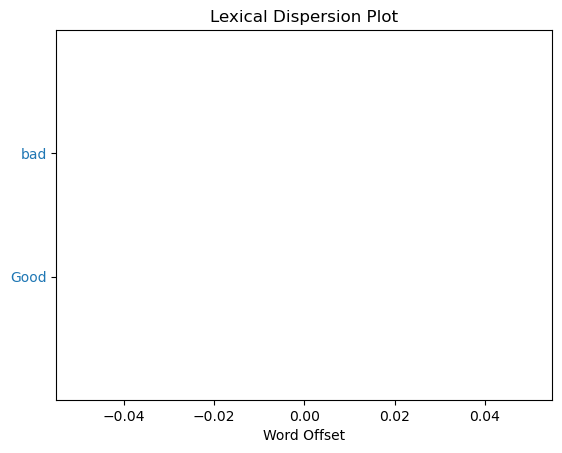

In [118]:
text_obj.dispersion_plot(['Good', 'bad'])

In [83]:
text_obj.similar("Crazy")

No matches


In [84]:
len(example)

79

In [85]:
set(example)

{' ',
 'H',
 'I',
 'a',
 'b',
 'c',
 'd',
 'e',
 'h',
 'i',
 'j',
 'k',
 'l',
 'o',
 'p',
 'r',
 't',
 'u',
 'v',
 'y'}

In [86]:
sorted(set(example))

[' ',
 'H',
 'I',
 'a',
 'b',
 'c',
 'd',
 'e',
 'h',
 'i',
 'j',
 'k',
 'l',
 'o',
 'p',
 'r',
 't',
 'u',
 'v',
 'y']

In [87]:
len(set(example)) / len(example) # Lexical Richness

0.25316455696202533

In [88]:
# word tokenization
print(example.split())

['Hi', 'I', 'love', 'you', 'too', 'happy', 'birthday', 'bhaiya', 'ji', 'ko', 'call', 'kar', 'rahe', 'hai', 'kya', 'baat', 'hai', 'to']


In [89]:
# sentence tokenizer
example.split('.')

['Hi I love you too happy birthday bhaiya ji ko call kar rahe hai kya baat hai to']

In [90]:
from nltk.tokenize import word_tokenize
print(word_tokenize(example))

['Hi', 'I', 'love', 'you', 'too', 'happy', 'birthday', 'bhaiya', 'ji', 'ko', 'call', 'kar', 'rahe', 'hai', 'kya', 'baat', 'hai', 'to']


In [91]:
#sentence_tokenizer
from nltk.tokenize import sent_tokenize
sent_tokenize(example)

['Hi I love you too happy birthday bhaiya ji ko call kar rahe hai kya baat hai to']

In [92]:
from nltk.tokenize import WhitespaceTokenizer
list(WhitespaceTokenizer().span_tokenize(example))

[(0, 2),
 (3, 4),
 (5, 9),
 (10, 13),
 (14, 17),
 (18, 23),
 (24, 32),
 (33, 39),
 (40, 42),
 (43, 45),
 (46, 50),
 (51, 54),
 (55, 59),
 (60, 63),
 (64, 67),
 (68, 72),
 (73, 76),
 (77, 79)]

# Filtering Stopwords

In [93]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))    #List of Stop Words
 
word_tokens = word_tokenize(example)       # Tokens (ALL)
print(word_tokens)
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]  
print(filtered_sentence)
#[This, sample, sentence, showing, stop, words, filteration]
# all words in word_tokens if its lower case is not in stop_words--> filtered_sentence
#with no lower case conversion
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words: #Not taking case into consideration
        filtered_sentence.append(w)
print(filtered_sentence)

['Hi', 'I', 'love', 'you', 'too', 'happy', 'birthday', 'bhaiya', 'ji', 'ko', 'call', 'kar', 'rahe', 'hai', 'kya', 'baat', 'hai', 'to']
['Hi', 'love', 'happy', 'birthday', 'bhaiya', 'ji', 'ko', 'call', 'kar', 'rahe', 'hai', 'kya', 'baat', 'hai']
['Hi', 'I', 'love', 'happy', 'birthday', 'bhaiya', 'ji', 'ko', 'call', 'kar', 'rahe', 'hai', 'kya', 'baat', 'hai']


# POS tagging 

In [94]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

# sent_tokenize is one of instances of 
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
 
tokenized = sent_tokenize(example)
for i in tokenized:
     
    # Word tokenizers is used to find the words 
    # and punctuation in a string        Sukanya, Rajib and Naba are my good friends.
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words] 
 
    #  Using a Tagger. Which is part-of-speech 
    # tagger or POS-tagger. 
    tagged = nltk.pos_tag(wordsList)
    print(example)
    print(tagged)

Hi I love you too happy birthday bhaiya ji ko call kar rahe hai kya baat hai to
[('Hi', 'NNP'), ('I', 'PRP'), ('love', 'VBP'), ('happy', 'JJ'), ('birthday', 'NN'), ('bhaiya', 'NN'), ('ji', 'NN'), ('ko', 'NN'), ('call', 'NN'), ('kar', 'NN'), ('rahe', 'NN'), ('hai', 'NN'), ('kya', 'NN'), ('baat', 'NN'), ('hai', 'NN')]


In [95]:
from nltk import pos_tag
from nltk import word_tokenize
 
tokenized_text = word_tokenize(example)
tags = tokens_tag = pos_tag(tokenized_text)
tags

[('Hi', 'NNP'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('you', 'PRP'),
 ('too', 'RB'),
 ('happy', 'JJ'),
 ('birthday', 'NN'),
 ('bhaiya', 'NN'),
 ('ji', 'NN'),
 ('ko', 'NN'),
 ('call', 'NN'),
 ('kar', 'NN'),
 ('rahe', 'NN'),
 ('hai', 'NN'),
 ('kya', 'NN'),
 ('baat', 'NN'),
 ('hai', 'NN'),
 ('to', 'TO')]

In [96]:
(example.count("a")/len(example))*100 # TERM FREQUENCY TF_IDF

15.18987341772152

In [97]:
import re                                #Regular Expression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Convert text to lowercase
text = example
print(text)
text = text.lower()
print(text)


# Remove special characters, punctuation, and numbers
text = re.sub(r'[^a-zA-Z\s]', '', text)
print(text)

Hi I love you too happy birthday bhaiya ji ko call kar rahe hai kya baat hai to
hi i love you too happy birthday bhaiya ji ko call kar rahe hai kya baat hai to
hi i love you too happy birthday bhaiya ji ko call kar rahe hai kya baat hai to


# Stop Words and POS Tagging

In [98]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
 
# Dummy text
txt = example
# sent_tokenize is one of instances of 
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
 
tokenized = sent_tokenize(txt) #Tokenize the whole text in sentences.
print(tokenized)
#print(txt)
for i in tokenized:
    # Word tokenizers is used to find the words 
    # and punctuation in a string  Once upon a time, There was a thirsty crow who was thirsty and searching for water.
    wordsList = nltk.word_tokenize(i)
    #print(wordsList)
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w.lower() in stop_words] 
    print(wordsList)    # ['Once', 'upon', 'time', ',', 'There', 'thirsty', 'crow', 'thirsty', 'searching', 'water', '.']
    #  Using a Tagger. Which is part-of-speech 
    # tagger or POS-tagger. 
    tagged = nltk.pos_tag(wordsList)
    print(tagged)    
    print('_______________________________________________________________________')

['Hi I love you too happy birthday bhaiya ji ko call kar rahe hai kya baat hai to']
['Hi', 'love', 'happy', 'birthday', 'bhaiya', 'ji', 'ko', 'call', 'kar', 'rahe', 'hai', 'kya', 'baat', 'hai']
[('Hi', 'NNP'), ('love', 'VBP'), ('happy', 'JJ'), ('birthday', 'NN'), ('bhaiya', 'NN'), ('ji', 'NN'), ('ko', 'NN'), ('call', 'NN'), ('kar', 'NN'), ('rahe', 'NN'), ('hai', 'NN'), ('kya', 'NN'), ('baat', 'NN'), ('hai', 'NN')]
_______________________________________________________________________


# Entities 

In [99]:
import nltk

# Download necessary NLTK data packages
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vivekvardhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vivekvardhan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/vivekvardhan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/vivekvardhan/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [100]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
 
# Dummy text
txt = example
# sent_tokenize is one of instances of 
# PunktSentenceTokenizer from the nltk.tokenize.punkt module

#txt = txt.lower()
#print(txt)

tokenized = sent_tokenize(txt) #Tokenize the whole text in sentences.
#print(tokenized)

for i in tokenized:
    # Word tokenizers is used to find the words 
    # and punctuation in a string  Once upon a time, There was a thirsty crow who was thirsty and searching for water.
    wordsList = nltk.word_tokenize(i)
    #print(wordsList)
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w.lower() in stop_words] 
    #print(wordsList)    # ['Once', 'upon', 'time', ',', 'There', 'thirsty', 'crow', 'thirsty', 'searching', 'water', '.']
    #  Using a Tagger. Which is part-of-speech 
    # tagger or POS-tagger. 
    tagged = nltk.pos_tag(wordsList)
    #print(tagged)        
    entities = nltk.ne_chunk(tagged)
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(entities)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
(S
  Hi/NNP
  love/VBP
  happy/JJ
  birthday/NN
  bhaiya/NN
  ji/NN
  ko/NN
  call/NN
  kar/NN
  rahe/NN
  hai/NN
  kya/NN
  baat/NN
  hai/NN)


# Preprocessing

In [101]:
import re
import nltk  # Import nltk library
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    print(text)
    print("__________________________________________________________________")
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    print(text)
    print("__________________________________________________________________")
    # Tokenize text
    tokens = word_tokenize(text)
    print(tokens)
    print("__________________________________________________________________")
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    print(tokens)
    print("__________________________________________________________________")
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    print(tokens)
    print("__________________________________________________________________")
    # POS tagging
    tags = pos_tag(tokens)
    print(tags)
    print("__________________________________________________________________")
    # Named Entity Recognition
    entities = nltk.ne_chunk(tags)  # Apply named entity recognition
    print(entities)
    print("__________________________________________________________________")
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Example usage
example = df['review_description'][0]  # Get the text from the first row of the 'Text' column
print(example)  # Printing the example text
print("__________________________________________________________________")
clean_text = preprocess_text(example)
print(clean_text)

Good
__________________________________________________________________
good
__________________________________________________________________
good
__________________________________________________________________
['good']
__________________________________________________________________
['good']
__________________________________________________________________
['good']
__________________________________________________________________
[('good', 'JJ')]
__________________________________________________________________
(S good/JJ)
__________________________________________________________________
good


# SPACY

In [102]:
example = df['review_description'][88]
print(example)

Hi I love you too happy birthday bhaiya ji ko call kar rahe hai kya baat hai to


In [103]:
import spacy 
obj = spacy.load("en_core_web_sm") #object of class   #(sm is source model, lm is language model)

doc = obj(example)
print("_________________________________________________________________________________")
for token in doc : 
    print(token.text, token.pos_, token.dep_) #depth is discription of pos tag. 

_________________________________________________________________________________
Hi INTJ intj
I PRON nsubj
love VERB ROOT
you PRON dobj
too ADV advmod
happy ADJ amod
birthday NOUN npadvmod
bhaiya PROPN compound
ji PROPN compound
ko PROPN nsubj
call PROPN ccomp
kar PROPN compound
rahe PROPN compound
hai PROPN compound
kya PROPN compound
baat PROPN compound
hai PROPN dobj
to PART ROOT


In [104]:
import spacy 
obj = spacy.load("en_core_web_sm") 

#Create an nlp Object
rel = obj(example)

# Iterate over the tokens
for token in rel : 
    # Print tokens and their part-of-speech tag
    print(token, "-->", token.tag_, "-->", token.pos_, "-->")

Hi --> UH --> INTJ -->
I --> PRP --> PRON -->
love --> VBP --> VERB -->
you --> PRP --> PRON -->
too --> RB --> ADV -->
happy --> JJ --> ADJ -->
birthday --> NN --> NOUN -->
bhaiya --> NNP --> PROPN -->
ji --> NNP --> PROPN -->
ko --> NNP --> PROPN -->
call --> NNP --> PROPN -->
kar --> NNP --> PROPN -->
rahe --> NNP --> PROPN -->
hai --> NNP --> PROPN -->
kya --> NNP --> PROPN -->
baat --> NNP --> PROPN -->
hai --> NNP --> PROPN -->
to --> TO --> PART -->


In [105]:
import spacy 
from spacy import displacy 
nlp = spacy.load("en_core_web_sm") 

doc = nlp(example)
displacy.render(doc, style = "dep", jupyter = True)

In [106]:
import spacy
obj = spacy.load("en_core_web_sm") # Object of class Spacy 

# Create an obj object 
rel = obj(example)

# Iterate over the tokens 
for token in rel:
    # Print the token and its parts-of-speech tag 
    print(token, "---->", token.tag_, "---->", token.pos_,"---->", spacy.explain(token.tag_))

Hi ----> UH ----> INTJ ----> interjection
I ----> PRP ----> PRON ----> pronoun, personal
love ----> VBP ----> VERB ----> verb, non-3rd person singular present
you ----> PRP ----> PRON ----> pronoun, personal
too ----> RB ----> ADV ----> adverb
happy ----> JJ ----> ADJ ----> adjective (English), other noun-modifier (Chinese)
birthday ----> NN ----> NOUN ----> noun, singular or mass
bhaiya ----> NNP ----> PROPN ----> noun, proper singular
ji ----> NNP ----> PROPN ----> noun, proper singular
ko ----> NNP ----> PROPN ----> noun, proper singular
call ----> NNP ----> PROPN ----> noun, proper singular
kar ----> NNP ----> PROPN ----> noun, proper singular
rahe ----> NNP ----> PROPN ----> noun, proper singular
hai ----> NNP ----> PROPN ----> noun, proper singular
kya ----> NNP ----> PROPN ----> noun, proper singular
baat ----> NNP ----> PROPN ----> noun, proper singular
hai ----> NNP ----> PROPN ----> noun, proper singular
to ----> TO ----> PART ----> infinitival "to"


In [107]:
for word in rel.ents:
    print(word.text, word.label_)

ji ko PERSON


In [108]:
for ent in rel.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

ji ko 40 45 PERSON


In [109]:
spacy.explain("FAC")

'Buildings, airports, highways, bridges, etc.'

In [110]:
displacy.render(doc,style="ent",jupyter=True)